# 🍫 **Chocolux - Analyse des ventes des quatre derniers mois**

- Objectif : mieux comprendre le comportement des clients, identifier les produits les plus performants, repérer les signaux d’alerte sur certains produits ou villes, et proposer des pistes concrètes pour améliorer l’offre et la qualité du service.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## 🧹 **Exercice 1 – Nettoyage des données clients**

### 1. Charger les données dans un dataframe, afficher les informations générales et examiner attentivement les données et repérer les problèmes potentiels (doublons, types incorrects, valeurs manquantes, incohérences…).

In [2]:
df = pd.read_csv("ventes_chocolux.csv")
df.head()

,commande_id,client_id,nom_client,age,genre,ville,produit_id,nom_produit,type_chocolat,quantite,prix_unitaire,date_commande,remarques_clients
0,CMD0001,C194,JOSEPH TORRES,24,M,toulouse,P001,Chocolux Noir 80%,noir,1,5.5,2024-12-30,NaN
1,CMD0002,C103,Laurence Jacques,53,M,Lille,P004,Chocolux Noir Fleur de Sel,noir,4,6.2,2025-03-19,NaN
2,CMD0003,C100,Matthieu Aubert,28,F,Lyon,P001,Chocolux Noir 80%,noir,3,5.5,2025-02-13,mauvais
3,CMD0004,C144,Alfred Nguyen,56,F,Nantes,P004,Chocolux Noir Fleur de Sel,noir,5,6.2,2025-02-13,NaN
4,CMD0005,C137,Constance Le Bonnet,58,F,Toulouse,P004,Chocolux Noir Fleur de Sel,noir,1,6.2,2025-03-03,NaN


In [3]:
#Informations générales
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   commande_id        521 non-null    object 
 1   client_id          521 non-null    object 
 2   nom_client         521 non-null    object 
 3   age                521 non-null    object 
 4   genre              521 non-null    object 
 5   ville              506 non-null    object 
 6   produit_id         521 non-null    object 
 7   nom_produit        521 non-null    object 
 8   type_chocolat      521 non-null    object 
 9   quantite           521 non-null    int64  
 10  prix_unitaire      521 non-null    float64
 11  date_commande      521 non-null    object 
 12  remarques_clients  49 non-null     object 
dtypes: float64(1), int64(1), object(11)
memory usage: 53.0+ KB


### Observation :

Le dataframe est composé de 521 lignes et 13 colonnes.
- Les colonnes 'Prix_unitaire' et 'quantite' sont aux formats `float64` et `int64`
- Les colonnes catégorielles (`genre`, `ville`, `nom_produit` et `type_chocolat`) sont au format `object`. Elles devront être modifiées au format `category`
- La colonne `date_commande` est au format `object`. Elle devra donc être modifiée pour être au format `datetime64` afin de faciliter les analyses temporelles

Deux colonnes comportent des valeurs manquantes :
- `ville` : 15 valeurs manquantes
- `remarques_clients` : 472 valeurs manquantes


In [4]:
#Vérification des doublons
print("Nombre de doublons: ", df.duplicated().sum())

Nombre de doublons:  14


In [10]:
#Identification des incohérences de la colonne Ville
df["ville"].value_counts()

ville
Paris        118
Lille         54
Nantes        54
Lyon          51
Marseille     51
Nice          42
Bordeaux      35
Toulouse      31
paris         17
lille          9
nantes         7
toulouse       6
nice           6
marseille      6
lyon           3
bordeaux       2
Name: count, dtype: int64

In [9]:
#Identification des incohérences de la colonne age
df["age"].value_counts()

age
53             22
57             16
60             16
22             16
33             16
26             14
55             14
21             13
24             12
61             12
44             12
46             12
42             12
38             12
50             12
51             11
43             11
23             11
65             11
35             11
62             11
29             11
48             11
20             11
49             10
63             10
31             10
41             10
trente-deux    10
19             10
45             10
28             10
52              9
18              9
36              8
39              8
64              8
27              8
56              8
40              8
59              8
47              7
58              7
32              7
37              7
30              6
34              3
25              3
54              3
Name: count, dtype: int64

In [12]:
#Identification des incohérences de la colonne Nom Produit
df["nom_produit"].value_counts()

nom_produit
Chocolux Lait Noisettes       158
Chocolux Noir 80%             151
Chocolux Noir Fleur de Sel     85
Chocolux Blanc Vanille         70
Chocolux Lait Caramel          43
Name: count, dtype: int64

In [13]:
#Identification des incohérences de la colonne type chocolat
df["type_chocolat"].value_counts()

type_chocolat
noir     236
lait     201
blanc     70
Name: count, dtype: int64

### Observations des incohérences :

Colonne `ville` :
- Certaines villes sont écrites de façon différentes. Un nettoyage a été réalisé dans le but d'harmoniser le tout.

Colonne `age` :
- L'age 'trente-deux' est écrit 10 en lettre alors qu'il est également présent en chiffres. Une harmonisation a également été faite

Colonne `nom_produit` et `type_chocolat` :
- Aucune incohérence détectée. 

### **2. Élaborer un plan de nettoyage clair.**

### Plan nettoyage :
- Suppression des doublons avec .drop_duplicates()
- Les valeurs des colonnes `age` et `ville` vont être harmonisées avec .replace()
- Les colonnes catégorielles (`genre`, `ville`, `nom_produit` et `type_chocolat`) vont être modifiées au format `category` avec .astype()
- La colonne `date_commande` va être modifiée au format `datetime64` avec pd.to_datetime()
- Vérification des modifications

### **3. Appliquer les traitements de nettoyage avec pandas**

In [6]:
# Suppression de tous les doublons 
df = df.drop_duplicates()
print("Nombre de doublons: ", df.duplicated().sum())

Nombre de doublons:  0


In [14]:
# Harmonisation des villes
df["ville"] = df["ville"].replace({"paris": "Paris", "lille": "Lille", "nantes": "Nantes", "lyon": "Lyon", "marseille" : "Marseille", "nice": "Nice", "bordeaux" : "Bordeaux","toulouse" : "Toulouse"})

In [20]:
# Harmonisation des ages
df["age"] = df["age"].replace({"trente-deux": "32"})

In [27]:
# Conversion des colonnes [genre], [ville], [nom_produit] et [type_chocolat]

df = df.astype({
    'genre': 'category',
    'ville': 'category',
    'nom_produit': 'category',
    'type_chocolat' : 'category'
})

In [22]:
# Conversion de la colonne [date_commande]
df['date_commande'] = pd.to_datetime(df['date_commande'])

In [23]:
# Vérification des harmonisations des colonnes [age] et [ville]
df["age"].value_counts()

age
53    22
32    17
22    16
33    16
60    16
57    16
55    14
26    14
21    13
50    12
44    12
46    12
42    12
38    12
24    12
61    12
51    11
48    11
62    11
43    11
65    11
29    11
20    11
35    11
23    11
41    10
19    10
63    10
45    10
28    10
49    10
31    10
52     9
18     9
40     8
56     8
27     8
59     8
36     8
64     8
39     8
58     7
47     7
37     7
30     6
54     3
34     3
25     3
Name: count, dtype: int64

In [24]:
df["ville"].value_counts()

ville
Paris        135
Lille         63
Nantes        61
Marseille     57
Lyon          54
Nice          48
Bordeaux      37
Toulouse      37
Name: count, dtype: int64

In [28]:
# Vérification des modifications des types de colonnes
df.dtypes

commande_id                  object
client_id                    object
nom_client                   object
age                        category
genre                      category
ville                      category
produit_id                   object
nom_produit                category
type_chocolat              category
quantite                      int64
prix_unitaire               float64
date_commande        datetime64[ns]
remarques_clients            object
dtype: object

In [30]:
df['age'] = df['age'].astype(int) #Modification d'une erreur fait plus haut : j'ai inversé la colonne [age] et [genre] au moment de la modification en 'category'

In [32]:
# Revérification des modifications des types de colonnes
df.dtypes

commande_id                  object
client_id                    object
nom_client                   object
age                           int64
genre                      category
ville                      category
produit_id                   object
nom_produit                category
type_chocolat              category
quantite                      int64
prix_unitaire               float64
date_commande        datetime64[ns]
remarques_clients            object
dtype: object

### **4. Bonus : Créer une fonction nettoyer_texte(colonne) qui : enlève les espaces inutiles, passe en minuscules, capitalise la première lettre de chaque mot.**

In [34]:
# .str.strip() : enlève les espaces avant et après
# .str.lower() : mets tout le texte en minuscule
# .str.title() : mets les premières lettres en lettre majuscule

def nettoyer_texte(colonne):
    colonne = colonne.str.strip()
    colonne = colonne.str.lower()
    colonne = colonne.str.title()
    return colonne

## 📊 **Exercice 2 : Analyse des ventes**

### **5. Créer une colonne chiffre_affaires puis réaliser un graphique en lignes de l’évolution du chiffre d’affaires dans le temps (par date de commande). Que remarques-tu ?**

In [37]:
# Création de la nouvelle colonne [chiffre_affaires]
df['chiffre_affaires'] = df['quantite'] * df['prix_unitaire']
df.head()

,commande_id,client_id,nom_client,age,genre,ville,produit_id,nom_produit,type_chocolat,quantite,prix_unitaire,date_commande,remarques_clients,chiffre_affaires
0,CMD0001,C194,JOSEPH TORRES,24,M,Toulouse,P001,Chocolux Noir 80%,noir,1,5.5,2024-12-30,NaN,5.5
1,CMD0002,C103,Laurence Jacques,53,M,Lille,P004,Chocolux Noir Fleur de Sel,noir,4,6.2,2025-03-19,NaN,24.8
2,CMD0003,C100,Matthieu Aubert,28,F,Lyon,P001,Chocolux Noir 80%,noir,3,5.5,2025-02-13,mauvais,16.5
3,CMD0004,C144,Alfred Nguyen,56,F,Nantes,P004,Chocolux Noir Fleur de Sel,noir,5,6.2,2025-02-13,NaN,31.0
4,CMD0005,C137,Constance Le Bonnet,58,F,Toulouse,P004,Chocolux Noir Fleur de Sel,noir,1,6.2,2025-03-03,NaN,6.2


### Explications : 
Pour pouvoir créer une nouvelle colonne `chiffre_affaires`, il fallait calculer `quantite`* `prix_unitaire`

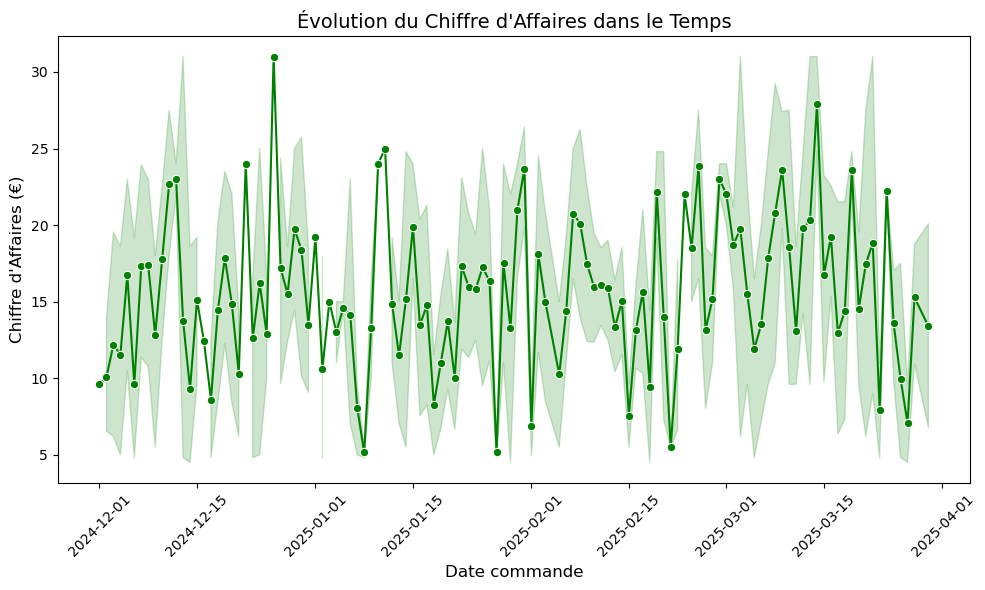

In [43]:
# Création du graphique en lignes
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='date_commande', y='chiffre_affaires', marker='o', color='green')

# Ajout du titre et des labels
plt.title('Évolution du Chiffre d\'Affaires dans le Temps', fontsize=14)
plt.xlabel('Date commande', fontsize=12)
plt.ylabel('Chiffre d\'Affaires (€)', fontsize=12)

# Sens d'affichage des valeurs sur l'axe x
plt.xticks(rotation=45)

# Afficher le graphique
plt.tight_layout()
plt.show()

### Interprétation du graphique

- **Fluctuations importantes** : Il y a des fortes augmentations ainsi que de fortes baisses du chiffre d'affaires sur la période. Ce qui semble indiquer que les ventes sont très variables.
- **Tendances** : Le graphique semble montrer un comportement cyclique ou irrégulier, sans tendances claires.
- **Augmentation visible** : Le pic le plus haut s'observent sur la période de fin décembre. Ce qui pourrait s'expliquer par les fêtes de fin d'année. 

### **6. Afficher précisément les CA par mois et détecter la période avec la plus forte croissance.**

In [47]:
# Il faut tout d'abord créer une nouvelle colonne pour stocker le mois de chacune des ventes

df['Mois'] = df['date_commande'].dt.strftime('%B') # La nouvelle colonne affiche le mois correspondant en lettre
df.head()

,commande_id,client_id,nom_client,age,genre,ville,produit_id,nom_produit,type_chocolat,quantite,prix_unitaire,date_commande,remarques_clients,chiffre_affaires,Mois
0,CMD0001,C194,JOSEPH TORRES,24,M,Toulouse,P001,Chocolux Noir 80%,noir,1,5.5,2024-12-30,NaN,5.5,December
1,CMD0002,C103,Laurence Jacques,53,M,Lille,P004,Chocolux Noir Fleur de Sel,noir,4,6.2,2025-03-19,NaN,24.8,March
2,CMD0003,C100,Matthieu Aubert,28,F,Lyon,P001,Chocolux Noir 80%,noir,3,5.5,2025-02-13,mauvais,16.5,February
3,CMD0004,C144,Alfred Nguyen,56,F,Nantes,P004,Chocolux Noir Fleur de Sel,noir,5,6.2,2025-02-13,NaN,31.0,February
4,CMD0005,C137,Constance Le Bonnet,58,F,Toulouse,P004,Chocolux Noir Fleur de Sel,noir,1,6.2,2025-03-03,NaN,6.2,March


In [49]:
# Affichage du CA par mois en utilisant .groupby()

ca_par_mois = df.groupby('Mois')['chiffre_affaires'].sum().reset_index()
ca_par_mois

,Mois,chiffre_affaires
0,December,1742.8
1,February,2581.9
2,January,1612.2
3,March,1845.7


### Observations : 
Nous pouvons facilement constater que le mois de décembre est le mois qui affiche la plus grosse évolution du chiffre d'affaires.

### **7. Identifier les 5 journées ayant généré le plus de chiffre d’affaires et observer si elles correspondent à des dates particulières. Interpréter ces résultats.**

In [53]:
# Dans un premier temps, il faut classer le CA par odre décroissant
df_ca_desc = df.sort_values(by='chiffre_affaires', ascending=False)

# Puis il faut afficher les 5 premiers résultats 
df_ca_desc.head(5)

,commande_id,client_id,nom_client,age,genre,ville,produit_id,nom_produit,type_chocolat,quantite,prix_unitaire,date_commande,remarques_clients,chiffre_affaires,Mois
210,CMD0211,C156,THIBAUT-WILLIAM BARTHELEMY,23,F,Nice,P004,Chocolux Noir Fleur de Sel,noir,5,6.2,2025-03-13,NaN,31.0,March
58,CMD0059,C100,Susan Merle du Moulin,24,F,Paris,P004,Chocolux Noir Fleur de Sel,noir,5,6.2,2025-03-22,NaN,31.0,March
74,CMD0075,C109,Emmanuelle-Denise Carlier,55,M,Paris,P004,Chocolux Noir Fleur de Sel,noir,5,6.2,2024-12-20,NaN,31.0,December
184,CMD0185,C148,Anouk Albert,50,F,Bordeaux,P004,Chocolux Noir Fleur de Sel,noir,5,6.2,2025-02-12,NaN,31.0,February
90,CMD0091,C138,Gabriel Blanchet,23,M,Paris,P004,Chocolux Noir Fleur de Sel,noir,5,6.2,2025-03-03,NaN,31.0,March


### Interprétation :

- Les 5 dates ont généré un CA de 31€
- Les dates n'ont, cependant, pas l'air de correspondre à des évènements particuliers du calendrier, mis à part pour les ventes du `2024-12-20` qui pourraient correspondre aux achats avant les fêtes de fin d'année. Les ventes du `2025-02-12` qui pourraient éventuellement s'expliquer par l'approche de la St-Valentin. Enfin, les ventes du `2025-03-03` pourraient s'expliquer par le Mardi Gras qui arrive juste après.

### **9. Réaliser un graphique en barres représentant le top 5 des produits les plus vendus en quantité.**

In [56]:
# Tout d'abord, il faut grouper par produits et faire la somme des quantités vendues
qte_par_produit = df.groupby('nom_produit')['quantite'].sum().reset_index()

qte_par_produit.head()

/var/folders/bv/n8vhn_t56251np3lpt5qph2m0000gn/T/ipykernel_1449/299873308.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  qte_par_produit = df.groupby('nom_produit')['quantite'].sum().reset_index()


,nom_produit,quantite
0,Chocolux Blanc Vanille,227
1,Chocolux Lait Caramel,130
2,Chocolux Lait Noisettes,471
3,Chocolux Noir 80%,425
4,Chocolux Noir Fleur de Sel,244


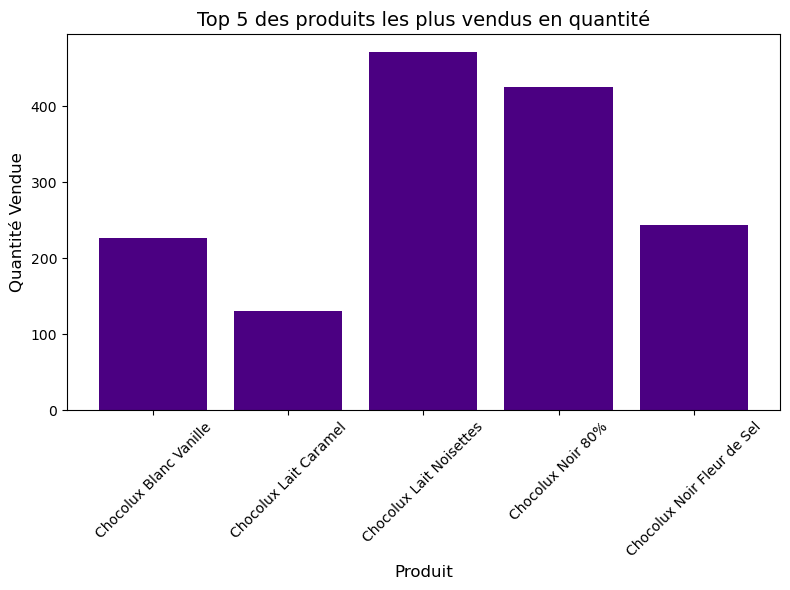

In [64]:
# Ensuite, nous pouvons créer le graphique 

plt.figure(figsize=(8, 6))
plt.bar(qte_par_produit['nom_produit'], qte_par_produit['quantite'], color='indigo')

plt.title('Top 5 des produits les plus vendus en quantité', fontsize=14)
plt.xlabel('Produit', fontsize=12)
plt.ylabel('Quantité Vendue', fontsize=12)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Observation :
Nous constatons que les produits :
- Chocolux Lait Noisettes
- Chocolux Noir 80%
sont les plus vendus.

Cela peut potentiellement s'expliquer par des prix plus attractif ou encore des saveurs plus appréciées des consommateurs.

### **9. Identifier les 3 villes les plus performantes en chiffre d’affaires total.**

In [70]:
# Il faut grouper par villes et faire la somme du CA
ca_ville = df.groupby('ville')['chiffre_affaires'].sum().reset_index()

# Puis afficher le tri par ordre décroissant
ca_ville_sorted = ca_ville.sort_values(by='chiffre_affaires', ascending=False)

# Afficher les 3 premiers résultats
ca_ville_sorted.head(3)

/var/folders/bv/n8vhn_t56251np3lpt5qph2m0000gn/T/ipykernel_1449/3077638377.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ca_ville = df.groupby('ville')['chiffre_affaires'].sum().reset_index()


,ville,chiffre_affaires
6,Paris,2139.5
1,Lille,944.4
3,Marseille,915.5


### Observation :

Nous constatons que les 3 villes les plus performantes en matière de CA sont :
- **Paris** : 2139.5€
- **Lille** : 944.4€
- **Marseille** : 915.5€

Ces résultats peuvent s'expliquer par différentes raisons comme le nombre de magasins implantés en ville ainsi que le localisation (facilité d'accès par exemple), le stock disponible, la superficie du magasin, la présence d'une forte concurrence ou encore les offres et promotions appliquées à chacun des magasins.

### **10. Calculer la dépense moyenne par client et le nombre de clients ayant dépensé plus de 100 €.**

In [73]:
# Dans notre cas, la moyenne se calcule comme suit : CA total / nb de client.

# Première étape : calcul du CA total 
CA_total = df['chiffre_affaires'].sum()

# Deuxième étape : calcul du nombre de client unique
nb_client_unique = df['client_id'].nunique()

# Troisième étape : calcul de la dépense moyenne par client 
depense_moyenne_client = CA_total / nb_client_unique

print(f"La dépense moyenne par client est de : {depense_moyenne_client:.2f}€")

La dépense moyenne par client est de : 77.83€


In [76]:
# Calcul du nombre de client ayant dépensé plus de 100€ 

# Filtrage des clients ayant dépensé plus de 100€
client_100 = df[df['chiffre_affaires'] > 100]

# Calcul du nombre de client 
nb_client_100 = client_100['client_id'].nunique()

print(f"{nb_client_100} clients ont dépensé plus de 100€")

0 clients ont dépensé plus de 100€


### Observation : 
- La dépense moyenne par client est de 77.83€ et aucun client n'a dépensé plus de 100€.

Cela pourrait potentiellement s'expliquer par un manque de vente additionnelle ou une offre assez complète, ce qui n'inciterait pas le client à consommer d'avantage.

## **🧮 Exercice 3 – Création d'une fonction d’analyse stratégique**

### **11. Créer une fonction evaluer_performance(ca, nb_clients) qui retourne :**
- **Blockbuster si CA ≥ 5000 € et clients ≥ 50**
- **Niche rentable si CA ≥ 5000 € mais clients < 50**
- **Produit prometteur si 1000 € ≤ CA < 5000 € et clients ≥ 20**
- **À retravailler dans tous les autres cas**

In [94]:
# Création de la fonction 

def evaluer_performance(ca, nb_clients):
    if ca >= 5000 and nb_clients >= 50 :
        return "Blockbuster"
    if ca >= 5000 and nb_clients < 50 :
        return "Niche rentable"
    if 1000 <= ca < 5000 and nb_clients >= 20 :
        return "Produit prometteur"
    else :
        return "À retravailler"

### **12. Calcule le chiffre d’affaires total et le nombre de clients distincts pour chaque produit, puis regroupe ces deux résultats dans un même tableau appelé produit_stats.**

In [110]:
#Il faut grouper par produit et calculer la somme du CA et du nombre de clients distincts

produit_stats = df.groupby('nom_produit').agg(
    CA_total_stats = ('chiffre_affaires', 'sum'),
    nb_client_unique_stats = ('client_id', 'nunique')
).reset_index()

display(produit_stats)

/var/folders/bv/n8vhn_t56251np3lpt5qph2m0000gn/T/ipykernel_1449/1024769367.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  produit_stats = df.groupby('nom_produit').agg(


,nom_produit,CA_total_stats,nb_client_unique_stats
0,Chocolux Blanc Vanille,1021.5,49
1,Chocolux Lait Caramel,650.0,35
2,Chocolux Lait Noisettes,2260.8,74
3,Chocolux Noir 80%,2337.5,80
4,Chocolux Noir Fleur de Sel,1512.8,58


### **13. Appliquer la fonction evaluer_performance sur chaque ligne pour créer la colonne statut_produit.**

In [99]:
# Appliquer la fonction evaluer_performance à chaque ligne de produit_stats en créant une nouvelle colonne
produit_stats['statut_produit'] = produit_stats.apply(
    lambda row: evaluer_performance(row['CA_total_stats'], row['nb_client_unique_stats']),
    axis=1
)

# Afficher le tableau
from IPython.display import display
display(produit_stats[['nom_produit', 'CA_total_stats', 'nb_client_unique_stats', 'statut_produit']]) #Utilisation de display car l'affichage n'était pas bon avec print()


,nom_produit,CA_total_stats,nb_client_unique_stats,statut_produit
0,Chocolux Blanc Vanille,1021.5,49,Produit prometteur
1,Chocolux Lait Caramel,650.0,35,À retravailler
2,Chocolux Lait Noisettes,2260.8,74,Produit prometteur
3,Chocolux Noir 80%,2337.5,80,Produit prometteur
4,Chocolux Noir Fleur de Sel,1512.8,58,Produit prometteur


### **14. Afficher le(s) produit(s) à retravailler.**

In [101]:
# Filtrer les produits à retravailler 
produits_retravailler = produit_stats[produit_stats['statut_produit'] == 'À retravailler']

# Affichage des produits
display(produits_retravailler[['nom_produit', 'CA_total_stats', 'nb_client_unique_stats', 'statut_produit']])

,nom_produit,CA_total_stats,nb_client_unique_stats,statut_produit
1,Chocolux Lait Caramel,650.0,35,À retravailler


### Observation :

Tous les produits sont, pour la plupart, des produits dit "prometteur". A l'exception du `Chocolux Lait Caramel` qui est un produit "à retravailler" au vu du chiffre d'affaires (650€) et du nombre de client (35) générés.

## **🔗 Exercice 4 – Croisement et insights**

### **15. Calcule le chiffre d’affaires total pour chaque client, trouve les clients qui sont dans les 10 % les plus dépensiers, récupère leurs identifiants, puis affiche leur âge, leur genre et leur ville sans doublons.**

In [106]:
# Calcul du CA total par client 
ca_par_client = df.groupby('client_id')['chiffre_affaires'].sum().reset_index()

# Trier les clients par leur chiffre d'affaires total en ordre décroissant
ca_par_client_sorted = ca_par_client.sort_values(by='chiffre_affaires', ascending=False)

# Trouver les 10 % des clients les plus dépensiers
client_10_percent = ca_par_client_sorted.head(int(len(ca_par_client_sorted) * 0.1))

# Récupérer les identifiants des clients les plus dépensiers
client_10_percent_id = client_10_percent['client_id']

# Filtrer les données originales pour ne garder que les clients dans les 10 % les plus dépensiers
client_top_10_percent = df[df['client_id'].isin(client_10_percent_id)]

# Afficher l'âge, le genre et la ville des clients sans doublons
clients_top_10_percent_info = client_top_10_percent[['client_id', 'age', 'genre', 'ville']].drop_duplicates()

# Afficher les résultats 
display(clients_top_10_percent_info)

,client_id,age,genre,ville
2,C100,28,F,Lyon
11,C117,50,F,Paris
27,C130,28,F,NaN
28,C100,42,F,Bordeaux
57,C153,58,M,Lille
...,...,...,...,...
463,C148,58,F,Lille
465,C119,31,M,Lyon
466,C117,44,M,Toulouse
480,C149,27,M,Paris


### **16. Comparer les volumes de vente selon type_chocolat et genre. (Tableau croisé)**

In [108]:
tableau_croise = pd.pivot_table(
    df,
    values='quantite',         # la colonne à agréger (volume de vente)
    index='type_chocolat',     # ligne = type de chocolat
    columns='genre',           # colonne = genre
    aggfunc='sum',             # somme des quantités vendues
    fill_value=0               # remplace les NaN par 0
)

display(tableau_croise)

/var/folders/bv/n8vhn_t56251np3lpt5qph2m0000gn/T/ipykernel_1449/3093521110.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tableau_croise = pd.pivot_table(


genre,F,M
type_chocolat,,
blanc,113,114
lait,254,347
noir,377,292


### Observation : 
Nous pouvons constater que chez les hommes, le type de chocolat le plus apprécié est le chocolat au lait.
Chez les femmes, il s'agit du chocolat noir

### **17. Crée une fonction nommée tranche_age(age) qui retourne <25, 25-45 ou >45, puis ajoute une colonne tranche_age dans le dataframe. Enfin, affiche le chiffre d’affaires total par ville et par tranche d’âge (tableau croisé).**

In [113]:
# Création de la fonction
def tranche_age(age):
    if age < 25 :
        return "<25"
    if 25 <= age <= 45:
        return "25-45"
    else :
        return ">45"

In [115]:
# Ajout nouvelle colonne [tranche_age] en lui appliquant la fonction
df['tranche_age'] = df['age'].apply(tranche_age)

df.head()

,commande_id,client_id,nom_client,age,genre,ville,produit_id,nom_produit,type_chocolat,quantite,prix_unitaire,date_commande,remarques_clients,chiffre_affaires,Mois,tranche_Age,tranche_age
0,CMD0001,C194,JOSEPH TORRES,24,M,Toulouse,P001,Chocolux Noir 80%,noir,1,5.5,2024-12-30,NaN,5.5,December,<25,<25
1,CMD0002,C103,Laurence Jacques,53,M,Lille,P004,Chocolux Noir Fleur de Sel,noir,4,6.2,2025-03-19,NaN,24.8,March,>45,>45
2,CMD0003,C100,Matthieu Aubert,28,F,Lyon,P001,Chocolux Noir 80%,noir,3,5.5,2025-02-13,mauvais,16.5,February,25-45,25-45
3,CMD0004,C144,Alfred Nguyen,56,F,Nantes,P004,Chocolux Noir Fleur de Sel,noir,5,6.2,2025-02-13,NaN,31.0,February,>45,>45
4,CMD0005,C137,Constance Le Bonnet,58,F,Toulouse,P004,Chocolux Noir Fleur de Sel,noir,1,6.2,2025-03-03,NaN,6.2,March,>45,>45


In [118]:
tableau_croise_ville_age = pd.pivot_table(
    df,
    values='chiffre_affaires', # la colonne à agréger (chiffre d'affaires)
    index='ville',             # ligne = ville
    columns='tranche_age',     # colonne = tranche d'âge
    aggfunc='sum',             # somme du chiffre d'affaires
    fill_value=0               # remplace les NaN par 0
)

display(tableau_croise_ville_age)

/var/folders/bv/n8vhn_t56251np3lpt5qph2m0000gn/T/ipykernel_1449/306909224.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tableau_croise_ville_age = pd.pivot_table(


tranche_age,25-45,<25,>45
ville,,,
Bordeaux,234.3,111.1,235.4
Lille,311.4,256.0,377.0
Lyon,331.9,143.9,348.9
Marseille,367.4,105.2,442.9
Nantes,441.3,104.7,362.7
Nice,243.1,170.8,340.8
Paris,934.6,383.2,821.7
Toulouse,231.4,32.2,221.6


### Observation : 

- Les moins de 25 ans : les chiffre d'affaires les plus élevés sont à Paris (383.2€) et Lille (256.0€)
- Le 25-45 ans : Paris détient le plus grand CA (934.6€), puis Nantes (441.3€)
- Les plus de 45 ans : Paris est en première position avec un CA de 821.7€, vient ensuite Marseille avec un CA de 442.9€

Nous pouvons constater que les 25-45 ans et les plus de 45 ans ont un pouvoir d'achat plus élevé et que **Paris génère le CA le plus élevé** dans les 3 tranches d'âge

### **18. Calculer l’âge moyen des clients par type de chocolat préféré.**

In [126]:
age_moyen_type = df.groupby('type_chocolat')['age'].mean().round().reset_index()
display(age_moyen_type)

/var/folders/bv/n8vhn_t56251np3lpt5qph2m0000gn/T/ipykernel_1449/4105840101.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_moyen_type = df.groupby('type_chocolat')['age'].mean().round().reset_index()


,type_chocolat,age
0,blanc,42.0
1,lait,41.0
2,noir,42.0


### Observation : 

Nous constatons que l'age moyen pour les 3 types de chocolat est quasiment le même (41-42 ans)

### **19. Identifier les produits préférés selon les tranches d’âge : <25 ans, 25-45, >45 ans.**

In [127]:
# Calcul de la somme des quantités vendues par produit et tranche d'âge
qte_produit_pref_age = df.groupby(['tranche_age', 'nom_produit'])['quantite'].sum().reset_index()

# Pour chaque tranche d'âge, il faut trouver les produits préférés. On va utiliser .idxmax() pour trouver le produit avec la quantité la plus élevée
produits_pref_tranche_age = qte_produit_pref_age.loc[
    qte_produit_pref_age.groupby('tranche_age')['quantite'].idxmax()
]

# Affichage des produits par tranche d'âge
display(produits_pref_tranche_age)

/var/folders/bv/n8vhn_t56251np3lpt5qph2m0000gn/T/ipykernel_1449/3968572088.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  qte_produit_pref_age = df.groupby(['tranche_age', 'nom_produit'])['quantite'].sum().reset_index()


,tranche_age,nom_produit,quantite
2,25-45,Chocolux Lait Noisettes,195
7,<25,Chocolux Lait Noisettes,89
12,>45,Chocolux Lait Noisettes,187


### Observation :

Pour les trois tranches d'âge, le produit le plus vendu est le `Chocolux Lait Noisettes`

## **📋 Exercice 5 – Analyse qualitative**

### **20. Créer une fonction contient_plainte() qui détecte si un texte contient un mot-clé parmi : "mauvais", "fondu", "cassé", "livraison lente". Appliquer cette fonction à la colonne remarques_clients pour créer une nouvelle colonne plainte contenant True ou False.**

In [128]:
# Création de la fonction 
def contient_plainte(texte):
    if not isinstance(texte, str):
        return False
    mots_cles = ["mauvais", "fondu", "cassé", "livraison lente"]
    texte_min = texte.lower()
    return any(mot in texte_min for mot in mots_cles)

In [130]:
# Application de la fonction à `remarques_clients`en créant une nouvelle colonne `plainte`
df['plainte'] = df['remarques_clients'].apply(contient_plainte)
df.head()

,commande_id,client_id,nom_client,age,genre,ville,produit_id,nom_produit,type_chocolat,quantite,prix_unitaire,date_commande,remarques_clients,chiffre_affaires,Mois,tranche_Age,tranche_age,plainte
0,CMD0001,C194,JOSEPH TORRES,24,M,Toulouse,P001,Chocolux Noir 80%,noir,1,5.5,2024-12-30,NaN,5.5,December,<25,<25,False
1,CMD0002,C103,Laurence Jacques,53,M,Lille,P004,Chocolux Noir Fleur de Sel,noir,4,6.2,2025-03-19,NaN,24.8,March,>45,>45,False
2,CMD0003,C100,Matthieu Aubert,28,F,Lyon,P001,Chocolux Noir 80%,noir,3,5.5,2025-02-13,mauvais,16.5,February,25-45,25-45,True
3,CMD0004,C144,Alfred Nguyen,56,F,Nantes,P004,Chocolux Noir Fleur de Sel,noir,5,6.2,2025-02-13,NaN,31.0,February,>45,>45,False
4,CMD0005,C137,Constance Le Bonnet,58,F,Toulouse,P004,Chocolux Noir Fleur de Sel,noir,1,6.2,2025-03-03,NaN,6.2,March,>45,>45,False


### **21. Identifier les produits les plus concernés.**

In [133]:
# Filtrer les produits avec des plaintes 
plaintes_produits = df[df['plainte'] == True]

# Compter le nombre de plaintes par produit
plainte_par_produit = plaintes_produits.groupby('nom_produit').size().reset_index(name='nb_plainte')

# Trier par nombre de plaintes décroissant
plainte_par_produit = plainte_par_produit.sort_values(by='nb_plainte', ascending=False)

display(plainte_par_produit)

/var/folders/bv/n8vhn_t56251np3lpt5qph2m0000gn/T/ipykernel_1449/3014978042.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plainte_par_produit = plaintes_produits.groupby('nom_produit').size().reset_index(name='nb_plainte')


,nom_produit,nb_plainte
3,Chocolux Noir 80%,31
2,Chocolux Lait Noisettes,10
4,Chocolux Noir Fleur de Sel,4
0,Chocolux Blanc Vanille,3
1,Chocolux Lait Caramel,0


### Observation :

Le `Chocolux Noir 80%` est le produit avec le plus de plaintes (31)

### **22. Créer un graphique camembert des 4 produits les plus cités.**

In [134]:
# Tri des 4 produits avec le plus de plaintes
top4_produits_plainte = plainte_par_produit.head(4)

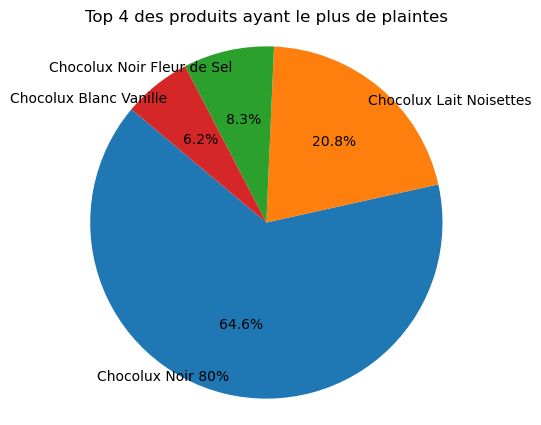

In [141]:
# Préparation des données pour le camembert
labels = top4_produits_plainte['nom_produit']
sizes = top4_produits_plainte['nb_plainte']

# Créer le graphique camembert
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, labeldistance=0.9)
plt.title("Top 4 des produits ayant le plus de plaintes")
plt.axis('equal')
plt.show()


### **23. Lister les villes avec le plus de plaintes par rapport aux commandes.**

In [147]:
# Nombre total de commandes par ville
total_commandes_ville = df.groupby('ville').size().reset_index(name='total_commandes')

# Nombre de plaintes par ville (lignes où plainte == True)
plaintes_ville = df[df['plainte'] == True].groupby('ville').size().reset_index(name='nb_plaintes')

# Fusionner les deux tables sur 'ville'
plaintes_vs_commandes = total_commandes_ville.merge(plaintes_ville, on='ville', how='left')

# Remplacer les NaN par 0 (villes sans plaintes)
plaintes_vs_commandes['nb_plaintes'] = plaintes_vs_commandes['nb_plaintes'].fillna(0)

# Calculer le ratio plaintes / commandes en pourcentage
plaintes_vs_commandes['ratio_plaintes'] = (plaintes_vs_commandes['nb_plaintes'] / plaintes_vs_commandes['total_commandes']) * 100

# Trier par ratio décroissant
plaintes_vs_commandes = plaintes_vs_commandes.sort_values(by='ratio_plaintes', ascending=False)

display(plaintes_vs_commandes)

/var/folders/bv/n8vhn_t56251np3lpt5qph2m0000gn/T/ipykernel_1449/2753552142.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_commandes_ville = df.groupby('ville').size().reset_index(name='total_commandes')
/var/folders/bv/n8vhn_t56251np3lpt5qph2m0000gn/T/ipykernel_1449/2753552142.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plaintes_ville = df[df['plainte'] == True].groupby('ville').size().reset_index(name='nb_plaintes')


,ville,total_commandes,nb_plaintes,ratio_plaintes
1,Lille,63,12,19.047619
0,Bordeaux,37,7,18.918919
6,Paris,135,13,9.629630
2,Lyon,54,5,9.259259
3,Marseille,57,4,7.017544
5,Nice,48,2,4.166667
4,Nantes,61,2,3.278689
7,Toulouse,37,0,0.000000


## **🏁 Question finale – Recommandations stratégiques**

### À l’issue de nos analyses, plusieurs enseignements se dégagent concernant les recommandations stratégiques :

#### **🍫 Performance produit :**

> Deux références se distinguent nettement tant en volume de ventes qu’en chiffre d’affaires :
> - `Chocolux Lait Noisette` : 471 unités vendues sur la période, générant un chiffre d’affaires de 2 260,80 €
> - `Chocolux Noir 80 %` : 425 unités vendues, pour un chiffre d’affaires de 2 337,50 €

Ces produits, véritables bestsellers de la gamme Chocolux, présentent un fort **potentiel de développement**. Il serait pertinent de renforcer leur valorisation à travers des actions marketing ciblées (mise en avant, offres spéciales, campagnes de communication).

Cette stratégie permettrait non seulement de **stimuler davantage les volumes de ventes**, mais également de **renforcer la fidélité** des clients déjà sensibles à ces produits.

---

#### **🔎 Produit à retravailler ou à repositionner :**

Le `Chocolux Lait Caramel` se distingue comme un produit nécessitant une **optimisation de sa stratégie commerciale**. Sur la période étudiée, il n’a été vendu qu’à **130 exemplaires**, générant un chiffre d’affaires de 650 €, ce qui en fait l’un des moins performants de la gamme.

> Ce faible résultat peut s’expliquer par plusieurs facteurs :
> - Un positionnement tarifaire inadapté, soit trop élevé pour sa catégorie, soit trop bas, pouvant évoquer une perception de qualité insuffisante ;
> - Un packaging peu attractif ou inadapté aux attentes des consommateurs ;
> - Un déficit de visibilité ou un manque d’actions marketing, que ce soit sur le plan digital ou en point de vente physique.

💡 <u>Recommandation opérationnelle</u>

Pour relancer l’intérêt autour de ce produit, il pourrait être judicieux de proposer des échantillons gratuits lors d’un achat en ligne ou en magasin. Cette action permettrait aux clients de découvrir le produit, de lever les freins à l’achat, et potentiellement d’augmenter son taux de conversion.

---

#### **📍 Ville et tranche d'âge à prioriser :**

L’analyse croisée du chiffre d’affaires par ville et par tranche d’âge permet d’identifier les zones géographiques et les segments démographiques les plus porteurs.

- **Paris – un fort potentiel à surveiller**
    - Avec un chiffre d’affaires total de **2 139,50 €**, Paris se positionne comme la ville au potentiel commercial le plus élevé.
      La tranche d’âge **25-45 ans** y est particulièrement dynamique, générant à elle seule 934,60 €.
*Cependant, le taux de plaintes élevé (9,62 % des commandes) constitue un point de vigilance à ne pas négliger.*

- **Lille – un segment senior à fort pouvoir d’achat**
  - Lille arrive en deuxième position avec **944,40 €** de chiffre d’affaires, principalement porté par les clients de **plus de 45 ans**, qui totalisent 377 €.

*Toutefois, cette ville enregistre le taux de plaintes le plus élevé parmi les trois (19 %), ce qui peut freiner la fidélisation si aucune action n’est menée.*

- **Marseille – une cible stable et prometteuse**
  - Avec **915,50 €** de chiffre d’affaires, Marseille se classe troisième, mais présente un segment **+45 ans** particulièrement actif (442,90 €).

*Elle se distingue également par un taux de plaintes relativement bas (7 %), ce qui en fait l'une des zones prioritaires de développement.*

> ⚠️ <u>Recommandation</u>
Il convient de ne pas sous-estimer l’impact du taux de plaintes dans l’interprétation de ces performances.
Nous proposerons ultérieurement des leviers d’amélioration pour réduire ces taux et consolider la fidélité client dans les zones les plus stratégiques.

---

#### **🏆 Mieux fidéliser les clients ayant un fort potentiel :**

Pour renforcer la fidélité des clients à fort potentiel, plusieurs actions marketing ciblées peuvent être envisagées. L’objectif est de leur offrir une expérience différenciante, de **renforcer leur attachement** à la marque Chocolux et d'encourager les achats récurrents.

- **Programme de fidélité :**

Un programme de fidélité structuré présente des **bénéfices à double sens** : il renforce le sentiment de reconnaissance et d’exclusivité côté client, tout en optimisant la rétention et le volume d’achat pour Chocolux.

Il pourrait inclure :
- Des avantages exclusifs (réductions, accès anticipé, cadeaux)
- L’accès à des ventes privées
- Des promotions personnalisées selon l’historique d’achat
- L’envoi de cadeaux personnalisés
- La découverte en avant-première des nouvelles collections

Ce programme pourrait s’articuler autour d’un système de points cumulables ou de paliers de fidélité (Bronze, Silver, Gold).

- **Personnalisation spéciale des produits :**

Offrir des produits personnalisés à ces clients renforce leur attachement à la marque. Par exemple :
- Packaging avec prénom ou message personnalisé
- Éditions limitées réservées aux clients fidèles

Ce type d’attention augmente la perception de valeur et favorise la fidélité émotionnelle.

- **Livraison offerte :**

Proposer la livraison gratuite, sans minimum d’achat, pour les clients à fort potentiel (via leur compte fidélité, par exemple) est une incitation directe à l’achat tout en renforçant la sensation de privilège.


Ces actions combinées visent à renforcer la fidélisation des meilleurs clients, tout en stimulant les ventes récurrentes. En valorisant ces profils stratégiques, Chocolux peut améliorer durablement sa performance commerciale.

---

#### **↗️ Réduire les plaintes et améliorer la satisfaction client :**

Dans une logique d’amélioration continue de l’expérience client, plusieurs leviers peuvent être mis en œuvre afin de réduire le volume de plaintes et accroître la satisfaction.

- **Enquête ciblée après achat :**

La mise en place systématique de courtes enquêtes post-achat permettrait de :

- Recueillir des retours à chaud sur l’expérience client
- Identifier rapidement les sources d’insatisfaction
- Détecter les points d’amélioration sur le parcours d’achat ou la qualité des produits
- Mettre en place des enquêtes ciblées après achat permettrait de réduire les plaintes


- **Analyser les plaintes les plus fréquentes :**

Un travail de fond sur les retours clients doit permettre de classifier les plaintes les plus récurrentes et d’y associer des actions correctives concrètes. Exemples :

<u>Produit `Chocolux Noir 80%` :</u> bien qu’il soit l’un des plus vendus, c’est aussi l’un des plus cités dans les réclamations.
>Recommandation : analyser les causes précises des plaintes (goût, emballage, texture), et ajuster si nécessaire la communication ou le conseil en point de vente.

<u>Produits fondus :</u> 
Identifier les produits les plus sensibles à la température, vérifier s’il s’agit d’un défaut inévitable (type de chocolat) ou améliorable (emballage, stockage, livraison), et envisager des solutions isothermes ou des mentions claires sur la fiche produit.

<u>Livraison lente / colis endommagés ("cassés") :</u> 
Revoir les process logistiques, en particulier le choix du transporteur, les délais garantis, et la robustesse de l’emballage.

- **Intégrer des gestes commerciaux ciblés :**

Suite aux enquêtes ou en réponse directe à une plainte, proposer des gestes commerciaux (ex. : bon de réduction pour une prochaine commande) permettrait :
- De transformer une insatisfaction en opportunité de fidélisation
- De montrer que la marque prend en compte chaque retour client
- D’améliorer l’image perçue de Chocolux

---

### **✅ Conclusion**

Au terme de cette analyse, plusieurs axes stratégiques prioritaires émergent :

- Valoriser les produits phares (`Chocolux Lait Noisette et Noir 80 %`) à travers des actions marketing ciblées, afin de capitaliser sur leur fort potentiel commercial.
- Repositionner les produits les moins performants, tels que le Lait Caramel, en ajustant leur stratégie de communication, de distribution ou de prix.
- Cibler les segments clients les plus porteurs (villes à fort potentiel et tranches d’âge génératrices de CA), tout en surveillant attentivement les taux de plaintes.
- Fidéliser les clients à fort potentiel via un programme de fidélité structuré, des avantages personnalisés et des offres exclusives.
- Réduire les plaintes en agissant sur les irritants identifiés (logistique, qualité perçue, conditionnement) et en instaurant une écoute client proactive.

La mise en œuvre cohérente de ces recommandations pourrait permettre non seulement d’améliorer la satisfaction et la fidélité client, mais contribuerait également à atténuer les fortes fluctuations de chiffre d’affaires observées, en renforçant la régularité des ventes tout au long de l’année et en limitant les effets de pics ponctuels.